In [6]:
#imports used in exercise
import numpy as np
import scipy as scp 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

#    Zadanie 1

W zadaniu pierwszym znajduje się implementacja algorytmu Jordana-Gaussa rozwiązywania układu równań liniowych kwadratowych w odmianie z częściowym poszukiwaniem elementu wiodącego. Na końcu sekcji przedstawione są wyniki porównań zaimplementowanego algorytmu z bibliotecznymi implementacjami z pakietów `numpy` i `scipy`.

In [9]:
def jordan_gauss(matrix):
    n: int
    if matrix.shape[0]+1 == matrix.shape[1]:
        n = matrix.shape[0]
    else:
        sys.exit("Non square matrix!")
    solution = np.zeros(n)
    # scaling phase 
    for row in range(n):
        row_max_abs = 0
        for col in range(n+1):
            row_max_abs = max(row_max_abs, abs(matrix[row, col]))
        if row_max_abs == 0:
            sys.exit("0 valued row not allowed!")
        matrix[row, :] = matrix[row, :]/row_max_abs
    for i in range(n):
        max_abs_index = i
        max_abs = abs(matrix[i, i])  # [max abs, max index]
        for m in range(i, n):
            if abs(matrix[m, i]) > max_abs:
                max_abs = abs(matrix[m, i])
                max_abs_index = m
            # max_abs[0]= max(max_abs[0],abs(matrix[m,i]))
            
        if max_abs == 0:
            sys.exit("Problem has more than 1 solution!")
        # swaping rows
        if max_abs_index!=i:
            tmp = matrix[i, i:].copy()
            matrix[i, i:] = matrix[max_abs_index, i:]
            matrix[max_abs_index, i:] = tmp
        for j in range(n):
            if i != j:
                ratio = matrix[j, i]/matrix[i, i]
                matrix[j, i] = 0
                matrix[j, i+1:] = matrix[j, i+1:]- ratio*matrix[i, i+1:]
   
    for i in range(n):
        solution[i] = matrix[i, n] / matrix[i, i]
    return solution


#### Funkcja pomocnicza do porównywania czasu działania algorytmu w 3 wyżej wspomnianych wersjach.

In [195]:
import time
def compare_results(matrix): #we give in matrix of dimensions [n,n+1]
    if (matrix.shape[0]+1 != matrix.shape[1]):
        sys.exit("Wrong matrix dimensions")
    n = matrix.shape[0]
    matrix_lib = matrix.copy()
    start = time.time()
    solution_lib = np.linalg.solve(matrix_lib[:, :n], matrix_lib[:, n])
    end = time.time()
    time_np = end - start
    start = time.time()
    solution_lib = scp.linalg.solve(matrix_lib[:, :n], matrix_lib[:, n])
    end = time.time()
    time_scipy = end-start
    start = time.time()
    solution_alg = jordan_gauss(matrix)
    end = time.time()
    time_alg = end - start
    # dist = np.linalg.norm(solution_alg-solution_lib)
    # print(f'My algortihm solution :{solution_alg}\n Library solution: {solution_lib}')
    # print(f'Euclidesian norm ( ||my_sol_vec - lib_sol_vec ||): {dist}\n\n')
    return n,time_alg,time_np,time_scipy



#### Tworzenie danych to testowania i analizy wyników

In [196]:
matrices = [np.array(np.random.randint(low=-10000, high=10000,size=(500, 501)), dtype=float),
np.array(np.random.randint(low=-100, high=100, size=(600, 601)), dtype=float),
np.array(np.random.randint(low=-100, high=100, size=(700, 701)), dtype=float),
np.array(np.random.randint(low=-100, high=100, size=(800, 801)), dtype=float),
np.array(np.random.randint(low=-100, high=100, size=(900, 901)), dtype=float),
np.array(np.random.randint(low=-100, high=100, size=(1000, 1001)), dtype=float),
np.array(np.random.randint(low=-100, high=100, size=(1200, 1201)), dtype=float),
np.array(np.random.randint(low=-100, high=100, size=(1400, 1401)), dtype=float),
np.array(np.random.randint(low=-100, high=100, size=(1500, 1501)), dtype=float),
np.array(np.random.randint(low=-100, high=100, size=(1600, 1601)), dtype=float)]



#### Przygotowanie odpowiednich struktur i przeprowadzenie testów oraz prezentacja wyników.

In [197]:
data = {
    "dimensions" : [],
    "jordan_gauss": [],
    "scipy.linalg.solve": [],
    "numpy.linalg.solve": [],
}
for mat in matrices:
    n,time_alg,time_np,time_scipy = compare_results(mat)
    data["dimensions"].append(n) 
    data["jordan_gauss"].append(time_alg) 
    data["scipy.linalg.solve"].append(time_scipy)
    data["numpy.linalg.solve"].append(time_np)

{'dimensions': [500, 600, 700, 800, 900, 1000, 1200, 1400, 1500, 1600], 'jordan_gauss': [0.8040056228637695, 1.1933472156524658, 1.6217846870422363, 2.1520891189575195, 2.783477783203125, 3.579875946044922, 5.341195106506348, 7.555195093154907, 8.744386672973633, 10.303089380264282], 'scipy.linalg.solve': [0.0321199893951416, 0.0182039737701416, 0.022387027740478516, 0.028080224990844727, 0.02899956703186035, 0.04590964317321777, 0.05593132972717285, 0.049523115158081055, 0.06651163101196289, 0.14007282257080078], 'numpy.linalg.solve': [0.29414868354797363, 0.020848989486694336, 0.021723270416259766, 0.02596879005432129, 0.028775453567504883, 0.027928590774536133, 0.03499436378479004, 0.042165517807006836, 0.044232845306396484, 0.0691375732421875]}


            jordan_gauss  scipy.linalg.solve  numpy.linalg.solve   best
dimensions                                                             
500             0.804006            0.032120            0.294149  scipy
600             1.193347            0.018204            0.020849  scipy
700             1.621785            0.022387            0.021723  numpy
800             2.152089            0.028080            0.025969  numpy
900             2.783478            0.029000            0.028775  numpy
1000            3.579876            0.045910            0.027929  numpy
1200            5.341195            0.055931            0.034994  numpy
1400            7.555195            0.049523            0.042166  numpy
1500            8.744387            0.066512            0.044233  numpy
1600           10.303089            0.140073            0.069138  numpy


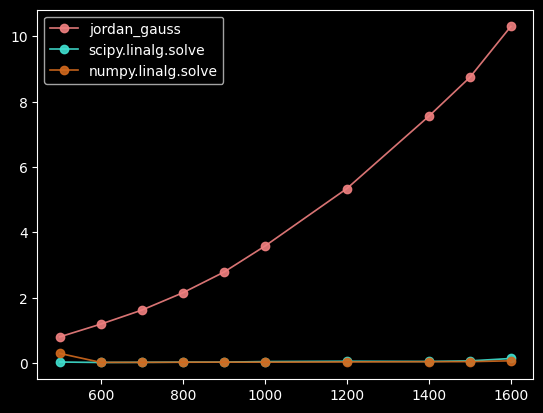

In [240]:
def choose_winner(x):
    if min([x['jordan_gauss'], x['scipy.linalg.solve'], x['numpy.linalg.solve']]) == x['jordan_gauss']:
        return 'jordan_gauss'
    if min([x['jordan_gauss'], x['scipy.linalg.solve'], x['numpy.linalg.solve']]) == x['scipy.linalg.solve']:
        return 'scipy'
    else :
        return 'numpy'
    
# creating dataframe 
df = pd.DataFrame(data)
df.set_index('dimensions', inplace=True)
df['best'] = df.apply(choose_winner,axis=1)
print(df)

# Ploting
plt.style.use("dark_background")
fig, ax = plt.subplots()
colors = ["lightcoral","turquoise","chocolate"]
for i in range(3):
    ax.plot(df.index,df[df.columns[i]], label=df.columns[i],
            color=colors[i], marker='o', linewidth=1.22, alpha=0.9)
ax.legend()
plt.show()

Zaimplementowany algorytm Jordana-Gaussa w wersji z partial pivotingiem zwraca poprawny wynik w każdym z przypadków. Wykonane pomiary dla 10 różnych wymiarów macierzy od 500x500 do 1600x1600 zgadzają się z przewidywaniami - biblioteczne funkcje wraz ze wzrostem wielkości danych wejściowych znacząco outperformują wyżej znajdującą się implementację algorytmu. Wyniki funkcji dla numpy i scipy są bardzo zbliżone, dla danej macierzy rzędu większego niż 700 w testach nieznaczną przewage uzyskuje funkcja z biblioteki numpy.

# ZADANIE 2

Zadanie drugie polegało na realizacji funkcji dokonującej faktoryzacji LU macierzy w wersji bez poszukiwania elementu wiodącego. Program ma wykonywać obliczenia w miejscu, odpowiednio modyfikując macierz na wejściu wpisując w odpowiednie miejsca kolejne współczynniki występujące w eliminacji Gaussa. Dokładnośc obliczeń jest weryfikowana poprzez $||A-LU||$

In [297]:
"""
    Function modifies given matrix in place -> 
    modified matrix becomes a "mix" of L and U matrix
    in LU decomposition (main axis is filled with U elements)
    because we know by default that main axis in L matrix is filled with ones

    FUNCTION MODIFIES MATRIX CORRECTLY ONLY WHEN no element in 0 on main axis
"""
def transform_gaussian(matrix):
    if (matrix.shape[0]!=matrix.shape[1]):
        sys.exit("Matrix should be of dimensions N x N")
    n = matrix.shape[0]
    for i in range(n):
        if matrix[i,i]==0:
            print(matrix)
            sys.exit("0 was met on main axis during Gaussian transformation")
        for j in range(i+1,n):
            ratio = matrix[j,i] / matrix[i,i]
            matrix[j,i]=ratio
            matrix[j,i+1:] -= ratio* matrix[i,i+1:]
    



In [387]:
def test_LU(A,full=False):
    if A.shape[0] != A.shape[1]:
        print("Given matrix must be of dimensions NxN")
        return
    n=A.shape[0]
    A_cp = A.copy()
    transform_gaussian(A)
    L = np.eye(n)
    U = np.eye(n)
    for i in range(n):
        for j in range(n):
            if i > j:
                L[i, j] = A[i, j]
            else:
                U[i, j] = A[i, j]
    if full:
        print(f'A before LU decomposition :\n{A_cp}')
        print(f'A after LU decomposition (insit) :\n{A}')
        print(f'L detached from A :\n{L}')
        print(f'U detached from A :\n{U}')
        print(f'A-LU : \n{A_cp-np.dot(L,U)}')
        print(f'|| A-LU || : \n{np.linalg.norm(A_cp-np.dot(L,U))}')
    return np.linalg.norm(A_cp-np.dot(L, U))

def create_test(numArr):
    results = []
    for n in numArr:
        val = test_LU(np.array(np.random.randint(-1000, 1000, size=(n, n)), dtype=float))
        if (val):
            results.append([n,val])
    return results

def separate_lines():
    print("==="*30,"\n")
    print("<*>"*30,"\n")
    print("==="*30,"\n")



In [388]:
# Test data - found on internet in example of algorithm - displaying full test parameters
test_LU(np.array([[1,2,3],[2,8,11],[3,14,25]], dtype=float),full=True)

# Creating dataframe of values of || A-LU || for different randomly created matrices of dimensions n
nums=[10,20,50,100,200,500,1000,2000]
norms = create_test(nums)
data= np.array([[int(item[0]) for item in norms], [item[1] for item in norms]])
df = pd.DataFrame(data).transpose()
df.columns = ["dimensions", "||A-LU||"]
df.set_index('dimensions',inplace=True)

A before LU decomposition :
[[ 1.  2.  3.]
 [ 2.  8. 11.]
 [ 3. 14. 25.]]
A after LU decomposition (insit) :
[[1. 2. 3.]
 [2. 4. 5.]
 [3. 2. 6.]]
L detached from A :
[[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]]
U detached from A :
[[1. 2. 3.]
 [0. 4. 5.]
 [0. 0. 6.]]
A-LU : 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
|| A-LU || : 
0.0


<Axes: xlabel='dimensions', ylabel='||A-LU||'>

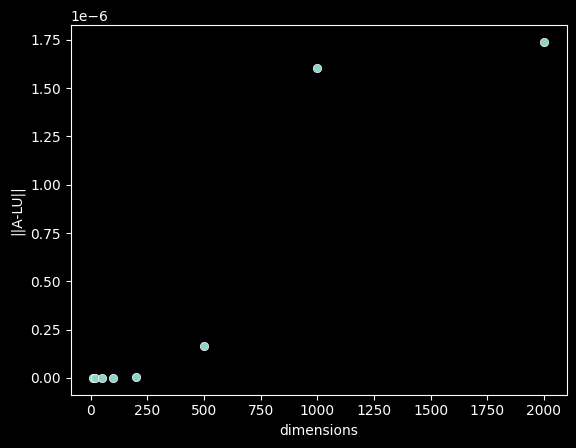

In [385]:
sns.scatterplot(df, x="dimensions", y= "||A-LU||")


Powyższa funkcja transform_gaussian dokonuje faktoryzacji LU macierzy A w wariancie bez poszukiwania elementu wiodącego i działa w miejscu (macierz na wejściu jest przekształcana w wyniku algorytmu gaussa i jest "kombinacją" macierzy U i L, które w testach z niej właśnie wyodrębniamy). Program w wariancie z mniejszą macierzą wypisuje kolejne postaci i wskaźniki, które pozwalają nam stwierdzić  poprawność stosowanego algorytmu. Jako wskaźnik dokładności dopasowania używam funkcji norm() z pakietu numpy.linalg. Funkcja biblioteczna wylicza normę Frobeniusa daną wzorem : 
$$||A_{F}||=[\sum_{i,j}^{}abs(a_{i,j})^2]^\frac{1}{2}$$
W następnej części przeprowadziłem pare testów dla macierzy różnych wymiarów. Z racji na sposób liczenia normy, uważam, że błędy są wystarczająco małe żeby algorytm uznać za poprawny (generowane macierze wejściowe  o wyrazach będącymi liczbami całkowitymi z zakresu <-1000,1000>). Zgodnie z przewidywaniami, zauważamy, że błąd wzrasta wraz z wymiarami macierzy, więc także z ilością elementarnych operacji mnożenia, dodawania i odejmowania liczb zmiennoprzecinkowych.

# ZADANIE 3

## Analiza obwodu elektrycznego - nadokreślony układ równań

Zadanie polegało na rozwiązaniu nadokreślonego układu równań w postaci układu elektrycznego reprezentowanego początkowo jako graf spójny nieskierowany. Program na wejściu otrzymuje graf reprezentowany jako lista krawędzi z wagami, które wskazują na rezystancję elementu zjadującego się pomiędzy dwoma węzłami układu (w tym przypadku wierzchołkami grafu) oraz 3 liczby:
-  s - pierwszy wierzchołek grafu między którym podłączone jest źródło zasilania ( nasze SEM )
-  t - pierwszy wierzchołek grafu między którym podłączone jest źródło zasilania ( nasze SEM )
-  SEM - wartość siły elektromotorycznej, napięcie zródła energii ( pomijamy opór wewnętrzny)

## Nadodkreślony układ równań
Z **nadokreślonym** układem liniowych równań algebraicznych mamy do czynienia w sytuacji gdy ilość liniowo niezależnych równań jest większa  niż wymiar przestrzeni w której szukamy rozwiązania naszego problemu ( liczba zmiennych ). W takiej sytuacji układ nie posiada jednoznacznego rozwiązania i w celu rozwiązania problemu trzeba przyjąć dodatkowe kryterium. Działanie opieramy na minimalizacji błędu poszukiwanego pseudorozwiązania w określonej metryce. W tym przypadku jako kryterium, przyjmiemy minimalizacje normy drugiej $||Ax-b||$ (nazywane również **wektorem residualnym**) dla równania $Ax=b$. W związku ze sposobem wyliczania minimalizowanej reszty proces ten nazywamy **liniowym zadaniem najmniejszych kwadratów**. 
<br><br><br>
Okazuje się, że tak sformułowane zagadnienie wygładzania liniowego ma jednoznaczne pseudorozwiązanie x*, które jest rozwiązaniem równania: 
  <p style="text-align:center;">$A^TAx = A^Tb$</p><br>
W przypadku, gdy macierz A jest macierzą kwadratową to rozwiązanie równania jest równe $x = A^{-1}b$, a co za tym idzie zadanie wygładzania liniowego jest uogólnieniem rozwiązywania kwadratowych układów równań liniowych (residuum wynosi wtedy 0).

Układ równań $A^TAx = A^Tb$ nazywamy **układem normalnym**. W najprostszym wariancie problemu nadokreślonego układu równań będziemy rozwiązywać układ normalny. Niestety w trakcie obliczeń występuje operacja mnożenia macierzy, która w arytmetyce float może generować błędy, które mogą dla szczególnych danych prowadzić nawet do zmiany rzędu macierzy.

## Zastosowanie w zadaniu
W celu rozwiązania problemu postawionego w zadaniu, dla zadanego grafu, chcemy doprowadzić do sytuacji, w której liczba liniowo niezależnych równań jest równa liczbie niewiadomych wartości natężenia prądu. Oznaczając jako $n$ liczbę węzłów oraz $m$ liczbę krawędzi grafu ( gdzie $m>=n$ z oczywistego faktu spójności grafu i posiadania przynajmniej jednego cyklu), zadanie sprowadza się do znalezienia m liniowo niezależnych równań. W tym celu skorzystamy z *I i II Prawa Kirchoffa*. Z pierwszego prawa Kirchoffa otrzymamy dokładnie n liniowo niezależnych równań, po jednym dla każdego z węzłów układu. Następnie potrzebujemy znaleźć przynajmniej m-n pozostałych liniowo niezależnych równań. W tym celu posłóżymy się *II Prawem Kirchoffa* i dla znalezionych cykli prostych ( charakterystycznych dla *II Prawa Kirchoffa oczek*) sformułujemy odpowiednie równania. Z oczywistych względów wierzchołki s i t muszą w szczególności należeć do pewnego wspólnego cyklu, w przeciwnym wypadku prąd w obwodzie nie popłynie, a wektor b będzie wektorem zerowym.

## Działanie programu
Program korzysta z biblioteki `NetworkX`, która zapewnia wiele funckjonalności usprawniających pracę z grafami i sieciami. Na początku z podanej listy wierzchołków tworzony jest graf nieskierowany. Następnym krokiem jest wylosowanie kierunku przepływu prądu dla każdej części obwodu w celu utworzenia odpowiednich równań korzystając Praw Kirchoffa. W programie zakładam za przyjęty na początku kierunek przepływu pradu kierunek wprost wynikający ze struktury podanych danych - krawędź (u,v,w) oznacza początkowo krawędź skierowaną prowadzącą z wierzchołka u do v o wadze (oporze w **$\Omega$**) równym **w**. W sytuacji gdy oszacowanie okaże się błędne wynik natężenia wyjdzie ujemny, więc trzeba go będzie zmienić na końcu na dodatni przy równoczesnej zmianie kierunku przepływu prądu w danej części obwodu. Sformułowanie równań odpowiednich dla *I Prawa Kirchoffa* odbywa się standardowo poprzez stworzenie odpowiedniego równania dla każdego wierzchołka grafu. Do realizacji 2 Prawa Kirchoffa wykorzystuję funkcję biblioteczną `cycle_basis(G)`, która zwraca minimalny zbiór cykli prostych w danym grafie, takich, że dowolny inny cykl mozna przedstawić jako sumę wyróżnionych cykli. W moim programie rozwiązuje problem poprzez rozwiązanie zadania najmniejszych kwadratów opisanego w akapicie dotyczącym nadokreślonych układów równań powyżej. Zadanie da się rozwiązać poprzez znalezienie jedynie $m-n$ równań, które wraz z równaniami z pierwszego kroku utworzą układ *m* równań liniowo niezależnych. W przypadku gdy utworzona na podstawie *Praw Kirchoffa* macierz jest rzędu niższego niż m, program zwraca błąd. W pozostałych przypadkach wykonuję proces opisany w paragrafie wyżej w funkcji solve, która znajduje się w sekcji kodu dla tego zadania. W funkcji solve korzystam z biblioteki numpy i metody transpose() do transpozycji numpy'owych tablic oraz funkcji `solve` z pakietu `numpy.linalg`. Na podstawie uzyskanych rezultatów ustalam ostateczny kierunek i wartość prądów w obwodzie. Po wykonaniu obliczeń, testuje ortrzymane wyniki sprawdzając dla każdego wierzchołka czy spełnione jest *I Prawo Kirchoffa*, z pewnym arbitralnie narzuconym błędem $\epsilon$. Jeżeli program nie napotka żadnych błędów po drodze, przechodzi do rysowania odpowiedniego wykresu korzystając z dostępnych w pakiecie `NetworkX` layout managerów. Program korzysta w zależności od charakterystyki konkretnego grafu z `nx.spring_layout()` oraz `nx.shell_layout()`.    


##  Wizualizacja i wynik działania programu
Program na wyjściu generuje korzystając z biblioteki `matplotlib` wykres grafu z graficznym uwzględnieniem kierunku oraz wartości przpływającego prądu w obwodzie. Wierzchołki między którymi przyłożona jest siła SEM są pokolorowanie na czerwono i są lekko większe od pozostałych, które są w białym kolorze. Wartość natężenia wpływa na kolor i grubość krawędzi - im ciemniejsza i grubsza tym większy prąd płynie w danej części obwodu. Po prawej stronie znajduje się pasek ze skalą kolorów, która pozwala na skojarzenie odpowiednich kolorów na wykresie z konkretnymi wartościami numerycznymi. W związku z możliwymi błędami wynikającymi między innymi z dużej ilości elementarnych operacji dodawania i odejmowania liczb zmiennoprzecinkowych ( np. przy opisanej wyżej metodzie najmniejszych kwadratów ), wyniki obarczone są pewnym możliwym błędem, a miejsca w których prąd nie płynie nie mają w większości natężenia dokładnie równego 0 ( są jemu wtedy bardzo bliskie ). Na wykresie krawędzi o zerowym natężeniu prądu są w kolorze białym, ich warości w większości przykładów są na tyle małe, że ewentualne zwroty w różne strony nie powodują anomalii w obwodzie. Poza przeprowadzonymi testami po wykonaniu obliczeń, warto przeanalizować jakich wyników się spodziewamy. 
<br>
Przewidujemy, że największe natężenie prądu ( najciemniejsze i najszersze krawędzie ) powinno występować w krawędzi przy której przyłożony jest SEM. Oczekujemy, że większa ilość ciemniejszych krawędzi wpadających do wierzchołka, w przypadku gdy krawędzi wyjściowych jest mniej, bedzie skutkować w ciemniejszych krawędziach wychodzących z takich wierzchołków. Po sekcji kodu znajduje się analiza wywołań i działania programu dla niektórych rodzin grafów o rzędach 15 - 200. W związku z charakterem wykresu, dla większej ilości danych wykresy mogą być trudne w analizie. W razie potrzeby biblioteka `NetworkX` zapewnia narzędzie graficzne z możliwościa przybliżenia wykresu w wybranym miejscu i powiększenia danych obszarów. Po włączeniu programu głównego załączonego w katalogu z zadaniem w IDE takim jak Visual Studio Code od Microsoft, powinno pokazań się okno multimedialne do interakcji z konkretnym wykresem.


<img src="test_figure.png" style="transform:scale(2);">
<h4 style="float:right;size:20px;">Program test output</h4>

## Implementacja
Program realizowany jest z użyciem biblioteki NetworkX.W mojej realizacji problemu, zdecydowałem się na zasilanie programu przez dane w formacie JSON, zlokalizowane w folderze załącznonym wraz ze sprawozdaniem w pliku `examples.json`. Po wczytaniu pliku i obiektu examples, otrzymujemy listę obiektów, każdy opisany przez atrybuty:
-  `name` &emsp;&nbsp;&nbsp; -> nazwa zespołu danych dla danego jednostkowego grafu
-  `s`   &nbsp;&emsp;&emsp;&emsp; -> opisane wyżej 
-  `t`    &emsp;&emsp;&emsp;&nbsp; -> opisane wyżej
-  `edges` &emsp; -> lista krawędzi grafu ważonego nieskierowanego w formacie (u,v,w), gdzie u i v to wierzchołki a w to waga krawędzi
-  `shell` &emsp; -> atrybut wskazuje programowi preferowany sposób wyświetlania wyników obliczeń ( wybór pomiędzy layout menadżerem `shell_layout` a `spring_layout`)
<br><br>
*Dzięki takiej reprezentacji, żeby rozszerzyć zbiór przykładów o własny, wystarczy dodać obiekt o opisanej strukturze do pliku `examples.json`.*


Poniżej znajduje się część programu rozwiązująca zadany problem. W załączonym folderze przesyłam także pełną wersję programu, w bloku main wywołane są tam kolejno operacje dla każdego zestawu danych z pliku `examples.json`. W programie obecna jest również dodatkowa funkcja generująca dane z wykorzystaniem biblioteki NetworkX, gdzie zakomentowane linie dotyczą różnych rodzajów rozważanych przeze mnie przypadków grafów. Poza opisanymi zmianami, w głównym programie zostały w niektórych miejscach zakomentowane bloki kodu ( głównie logi ), pomocne przy sprawdzaniu wyniku kolejnych obliczeń i operacji.

In [1]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt 
import json
import random

In [2]:
# assume tuple (u,v,R) where u and v are nodes while R means resistence of this edge
# weighted_edges example: [(0,1,2),(1,2,3),(2,3,3), (3,4,5), (4,5,3),(5,0,2),(2,5,2),(3,1,7),(5,6,2),(4,7,10)]
# s, t ,SEM = 1, 3 ,12
# data stored in local json file, examples shown in notebook are from examples.json file

"""
    Function drawing graph based on given args: 
    G_und -> undirected graph ( used to produce node layout coordinates )
    G     -> out directed graph, computed in our algorithm 
    s     -> SEM starting node
    t     -> SEM ending node
    SEM   -> SEM value
    shell -> argument according to layout (in some cases shell layout makes graph more vivid and easier to 
    analyse)
"""
def draw_graph(G,G_und,s,t,SEM,shell):
    fig = plt.figure()
    plt.title(f's : {s}, t: {t} , SEM: {SEM}', color="#F0FFF0",
              fontsize=14, loc='left', fontweight=12)
    if (shell):
        pos = nx.shell_layout(G)
    else:
        pos = nx.spring_layout(G_und)
    # numerical values may be changed, chosen values in my opinion tend to be
    # most suitable for wider range of different graphs and input values ( subjective approach )
    scale = len(G.nodes)
    weights = list(nx.get_edge_attributes(G, 'weight').values())
    max_weight = max(nx.get_edge_attributes(G, 'weight').values())
    min_weight = min(nx.get_edge_attributes(G, 'weight').values())
    weight_ratios = [ G[u][v]['weight']/max_weight for u,v in G.edges ]
    node_coloring = ['#f4f4f4' if (v!=s and v!=t) else "darkred" for v in G.nodes ]
    node_sizes = [1 if (v!=t and v!=s) else 3 for v in G.nodes]
    nx.draw(G, pos=pos, node_color=node_coloring, node_size=20, edgelist=G.edges,
            edge_color=weights, width=[0.08+weight for weight in weight_ratios], edge_cmap=plt.cm.YlOrBr, 
            with_labels=False, arrowsize=[4 + weight * 200/scale for weight in weight_ratios])
    
    # Adding cmap bar:
    sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrBr,norm = plt.Normalize(vmin=min_weight,vmax=max_weight))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label("Amper",  color="#f4f4f4")
    cbar.ax.yaxis.set_tick_params(color= '#f4f4f4')
    cbar.outline.set_edgecolor('#f4f4f4')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color=  '#f4f4f4')
    
    # Setting background color :
    fig.set_facecolor("#333")
    plt.show()


"""
    Simple solver, described in theoretical part
    A_t means transposed A matrix, dot is multiplication of matrices
"""
def solve(A,D):
    A_t = A.transpose()
    A = A_t.dot(A) 
    D = A_t.dot(D)
    try:
        solution = np.linalg.solve(A,D)
    except:
        print("Err while computing solution, matrix is singular")
        exit(1)
    return solution.flatten()


"""
    As for validation, I simply check the first Kirchoffs
    law, and wheter it's working for each node getting into consideration the 
    fixed accuracy 
"""

def validate_graph(G):
    for v in G.nodes:
        in_E = G.in_edges(v)
        out_E = G.out_edges(v)
        sum_in = sum([G.get_edge_data(ver[0], ver[1])['weight']
                     for ver in in_E])
        sum_out = sum([G.get_edge_data(ver[0], ver[1])['weight']
                      for ver in out_E])
        if abs(sum_in-sum_out) > 1e-5:
            return False
    return True

""" 
    Main utility function, Here we build our matrix with first 
    and second Kirchoff's law. Here i build a dictionary where tuples indicating edge are keys,
    and integers indicating current_id(edge_id) are values. Futhermore i build matrix reprezentation of 
    weighted edges in order to have O(1) access and make the code cleaner.
    When there occurs to be a solution of the overdetermined set of equasions, we create
    new, directed graph, which will be the lion's share of our drawing utility
"""

def calculate_create_graph(weighted_edges,s,t,SEM):
    G_ud = nx.Graph()
    G_ud.add_weighted_edges_from(weighted_edges)
    g_nodes = G_ud.nodes
    g_edges = G_ud.edges
    V_num = len(g_nodes)
    E_num = len(g_edges)
    edge_id = dict([[(u, v), i] for i, (u, v, w) in enumerate(weighted_edges)])
    g_matrix = np.zeros(V_num**2).reshape(V_num, V_num)
    for u, v, w in weighted_edges:
        g_matrix[u, v] = w

    # Applying 1st Kirchoff law:
    first_k_law_M = np.zeros(V_num*(E_num+1)).reshape(V_num, E_num+1)
    for i in range(V_num):
        # additive
        for u in np.nonzero(g_matrix[:, i])[0]:
            index = edge_id.get((u, i)) if edge_id.get(
                (u, i)) is not None else edge_id.get((i, u))
            first_k_law_M[i, index] = 1
        # substractive
        for u in np.nonzero(g_matrix[i, :])[0]:
            index = edge_id.get((u, i)) if edge_id.get(
                (u, i)) is not None else edge_id.get((i, u))
            first_k_law_M[i, index] = -1

    cycles = nx.cycle_basis(G_ud)
    cycles_num = len(cycles)

    second_k_law_M = np.zeros(
        cycles_num*(E_num+1)).reshape(cycles_num, (E_num+1))
    for eq_num, cycle in enumerate(cycles):
        for i in range(1, len(cycle)):
            v = cycle[i]
            u = cycle[i-1]
            if u == s and v == t:
                second_k_law_M[eq_num, E_num] = SEM
                continue
            elif u == t and v == s:
                second_k_law_M[eq_num, E_num] = -SEM
                continue
            index, local_R = (edge_id.get((u, v)), g_matrix[u][v]) if edge_id.get(
                (u, v)) is not None else (edge_id.get((v, u)), -g_matrix[v][u])
            second_k_law_M[eq_num, index] = local_R
        u = cycle[len(cycle)-1]
        v = cycle[0]
        if u == s and v == t:
            second_k_law_M[eq_num, E_num] = SEM
            continue
        elif u == t and v == s:
            second_k_law_M[eq_num, E_num] = -SEM
            continue
        index, local_R = (edge_id.get((u, v)), g_matrix[u][v]) if edge_id.get(
            (u, v)) is not None else (edge_id.get((v, u)), -g_matrix[v][u])
        second_k_law_M[eq_num, index] = local_R

    A = np.concatenate((first_k_law_M[:, :-1], second_k_law_M[:, :-1]))
    D = np.concatenate((first_k_law_M[:, -1], second_k_law_M[:, -1]))

    
    G_d = nx.DiGraph()
    result = solve(A, D)

    # reverse dictionary to get fast reverse access
    max_I = max(result)
    rev_id = {i: vertices for vertices, i in edge_id.items()}

    # Completing our new, weighted graph
    for i, result in enumerate(result):
        u, v = rev_id.get(i)
        if result >= 0:
            G_d.add_weighted_edges_from([(u, v, result)])
        else:
            G_d.add_weighted_edges_from([(v, u, -result)])
    return G_d, G_ud

"""
    Helping function, to validate_graph, and if it occurs to be correct, draws the result of 
    calculations
"""
def solve_circuit(s,t,SEM, weighted_edges, shell):
    G_directed, G_undirected = calculate_create_graph(weighted_edges, s, t, SEM)
    if not validate_graph(G_directed):
        print("Incorrect result")
        exit(1)
    draw_graph(G_directed, G_undirected, s, t, SEM,shell)

In [3]:
data = []
data={}
with open("examples.json") as f:
    data= json.load(f)['examples']

<h1> Dwie Kliki $K4$ połączone mostem</h1>

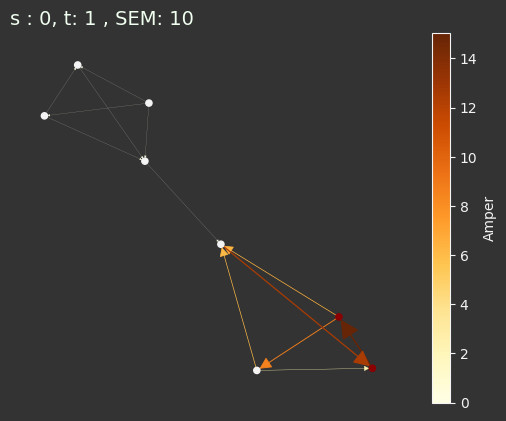

In [18]:
graph_data = data[0]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

Zgodnie z oczekiwaniami prąd nie popłynie do drugiej części obwodu (drugiej kliki). Nie istnieje cykl prosty do którego należy s i t przebiegający do drugiej części obwodu. Widzimy, że zgodnie z oczekiwaniami największe natężenie prądu obserwujemy w krawędzi, gdzie przyłożyliśmy SEM. Mniejsze prądy zbiegają się ze sobą i wypadkowo dają na wyjściu większy prąd. 

<h1> Graf typu small-world rzędu 20</h1>

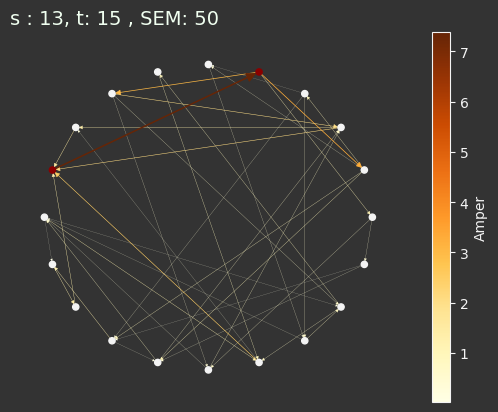

In [11]:
graph_data = data[1]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

W tym przypadku obserwujemy dużo większe rozdzielenie prądów w obwodzie. Widzimy, że zgodnie z oczekiwaniami największe natężenie prądu obserwujemy w krawędzi, gdzie przyłożyliśmy SEM. Mniejsze prądy zbiegają się ze sobą i wypadkowo dają na wyjściu większy prąd. Graf został wygenerowany za pomocą funkcji <i>watts_strogatz_graph<i> z pakietu NetworkX z parametrami n=20, k=4, p=0.6. Przy wyświetlaniu użyłem display managera <i>shell_layout<i> dla lepszej widoczności 

<h1> Graf typu siatka 2D o wymairach 4x6</h1>

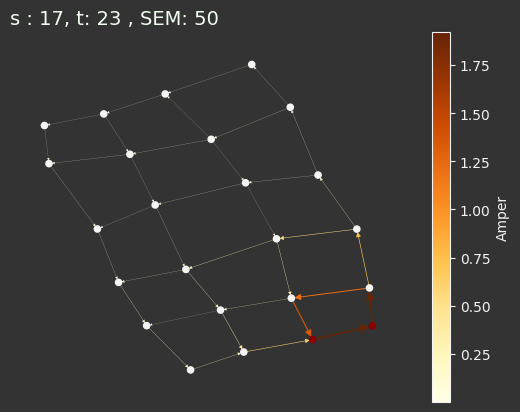

In [12]:
graph_data = data[2]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

Widzimy regularną strukturę grafu typu siatka. Widzimy, że zgodnie z oczekiwaniami największe natężenie prądu obserwujemy w krawędzi, gdzie przyłożyliśmy SEM. Mniejsze prądy zbiegają się ze sobą i wypadkowo dają na wyjściu większy prąd. Graf został wygenerowany za pomocą funkcji <i>nx.grid_2d_graph<i> z pakietu NetworkX. Co ciekawe, im dalej w strukturze grafu, tym mniejszy prąd tam płynie. Największy prąd jest skoncentrowany z "prostokącie" gdzie przyłożona jest SEM .

<h1> Graf typu siatka 2D o wymiarach 11x12</h1>

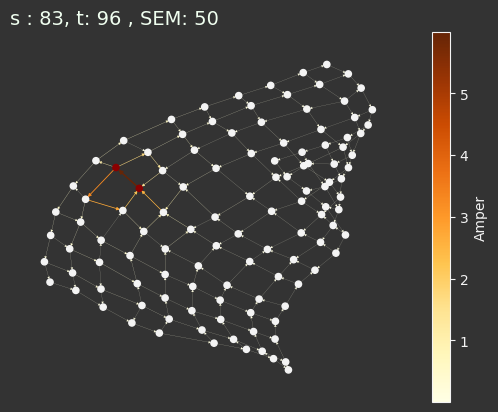

In [13]:
graph_data = data[3]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

Widzimy regularną strukturę grafu typu siatka. Widzimy, że zgodnie z oczekiwaniami największe natężenie prądu obserwujemy w krawędzi, gdzie przyłożyliśmy SEM. Mniejsze prądy zbiegają się ze sobą i wypadkowo dają na wyjściu większy prąd. Graf został wygenerowany za pomocą funkcji <i>nx.grid_2d_graph<i> z pakietu NetworkX. Tym razem "oczko" w którym przyłożono SEM znajduje się bliżej "środka" siatki grafu na rysunku powyżej. Obserwujemy bardzo podobny przebieg, co w poprzednim przykładzie. 

<h1> Graf losowy Erdos-Renyi rzędu 13</h1>

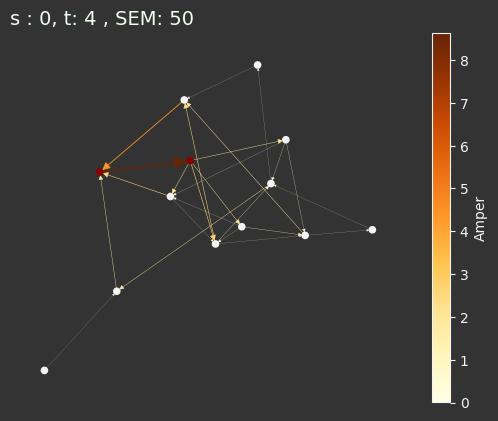

In [14]:
graph_data = data[4]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

Tym razem mamy pokazany graf losowy rzędu 13 wygenerowany przy pomocy funkcji <i>erdos_renyi_graph</i> z pakietu Networkx. Graf został wyświetlony przy pomocy layout_managera <i>spring_layout</i>.
Zgodnie z oczekiwaniami do wierzchołków rzędu 1 prąd nie płynie (na rysunku najniższy wierzchołek). Widzimy większe rozgałęzienia zauważalnych prądów w porównaniu do grafów typu siatka.

<h1> Graf kubiczny jako sześcian </h1>

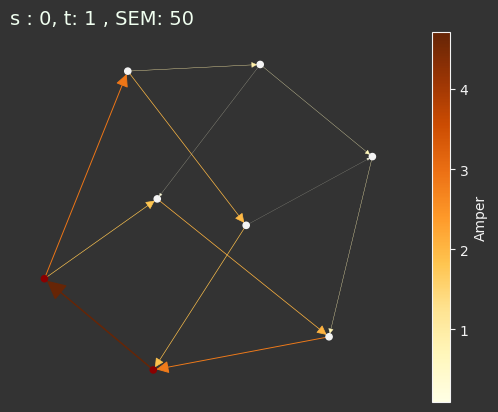

In [15]:
graph_data = data[5]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

Jako pierwszy przykład grafu kubicznego wybrałem najzwyklejszy sześcian. Graf został wygenerowany przy użyciu funkcji cubical_graph z pakietu NetworkX. Widzimy jak rozkłada się płynący w obwodzie prąd. Patrząc na rysunek, prąd wybiera ściany sześcianu których krawędzią składową jest krawędź z naszym SEM i tam właśnie ma on największą wartość. Im "dalej" od tego wierzchołka tym coraz mniejszy ewentualny prąd płynie w poszczególnych elementach obwodu.

<h1> Graf kubiczny jako Graf Petersena </h1>

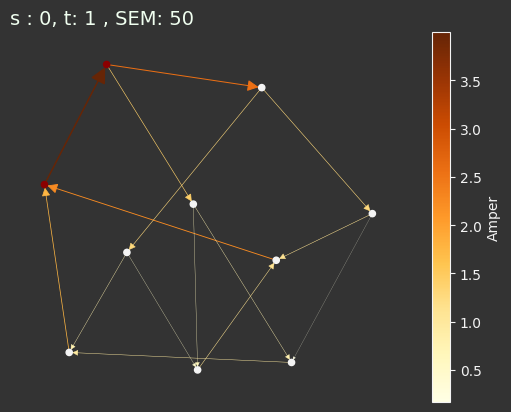

In [16]:
graph_data = data[6]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

Jako kolejny przykład grafu kubicznego wybrałem Graf Petersena. Graf został wygenerowany przy użyciu funkcji petersen_graph z pakietu NetworkX. Widzimy jak rozkłada się płynący w obwodzie prąd. Zauważalny prąd płynie prawie w każdej krawędzi obwodu. Prądy zgodnie z oczekiwaniami zbiegają się do wierzchołka s i generują wypadkowo największy prąd na krawędzi s-t.

<h1> Graf losowy erdos-renyi rzędu 140 </h1>

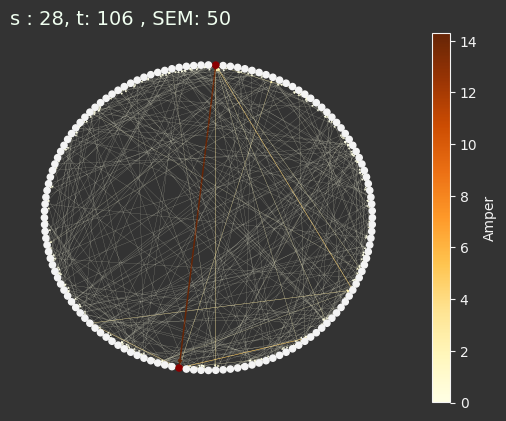

In [17]:
graph_data = data[7]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

W celu zwiększenia przejrzystości przykładu zastosowano shell_layout. Dla grafów losowych większych wymiarów wygenerowany obraz staje się trudniejszy w analizie, więc proponuje włączenie tego przykładu np. w Visual Studio Code od Microsoft. Widzimy, że opisywane wcześniej charakterystyczne cechy które powinien spełniać obwód po obliczeniach są spełnione. Graf losowy ma bardziej chaotyczną strukturę co utrudnia jego dogłębną analize, w szczególności przy wiekszych wymiarach danych.

## Poza opisanymi przypadkami na koniec prezentuje jeszcze pare przykładowych wywołań programu dla różnych grafów

<h1> Graf drabinkowy rzędu 40 </h1>

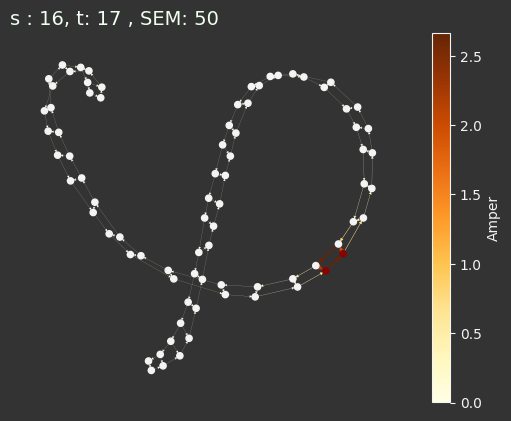

In [7]:
graph_data = data[8]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

<h1> Graf siatka 14 x 15 </h1>

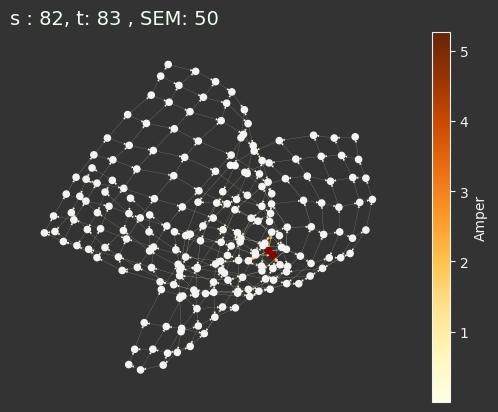

In [8]:
graph_data = data[9]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

<h1> Graf typu small world rzędu 100 </h1>

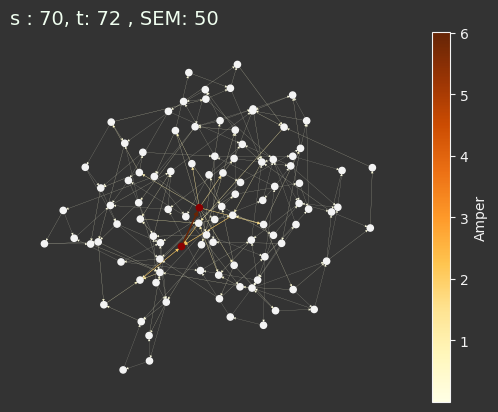

In [10]:
graph_data = data[10]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)

<h1> 2 grafy losowe odpowiednio rzędu 50 i 20 połączone mostem </h1>

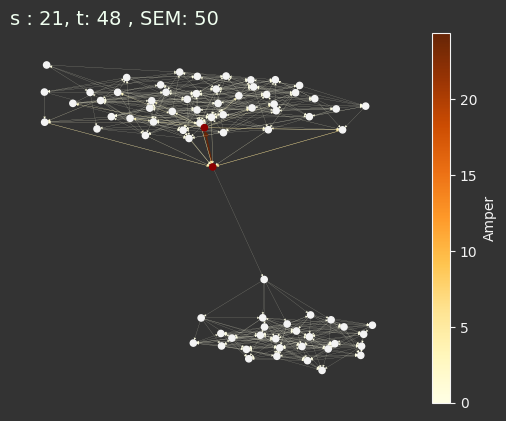

In [11]:
graph_data = data[11]
s, t, SEM, weighted_edges,shell = graph_data['s'], graph_data['t'], graph_data['SEM'], graph_data['edges'],graph_data['shell']
solve_circuit(s, t, SEM, weighted_edges,shell)